# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City '" + city.title() + "' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itoman
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | siwa oasis
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | mount pearl
Processing Record 8 of Set 1 | poltavka
Processing Record 9 of Set 1 | vorgashor
Processing Record 10 of Set 1 | mukalla
Processing Record 11 of Set 1 | scone
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | uturoa
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | pibor
City 'Pibor' not found. Skipping...
Processing Record 17 of Set 1 | springs
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | zhangjiakou shi xuanhua qu
Processing Record 20 of Set 1 | mitu
Processing Record 21 of Set 1 | olonkinbyen
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

## NOT IN ORIGINAL STARTERCODE: I ADDED TO GET THE DATE CORRECT ON SCATTERPLOTS
# Convert datetime to readable date format
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],)).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,itoman,26.1247,127.6694,27.43,55,40,5.66,JP,1970-01-01
1,papatowai,-46.5619,169.4708,14.37,60,6,5.42,NZ,1970-01-01
2,port-aux-francais,-49.3500,70.2167,1.86,63,66,11.90,TF,1970-01-01
3,adamstown,-25.0660,-130.1015,22.65,81,100,4.23,PN,1970-01-01
4,siwa oasis,29.2041,25.5195,21.27,75,0,2.87,EG,1970-01-01


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itoman,26.1247,127.6694,27.43,55,40,5.66,JP,1970-01-01
1,papatowai,-46.5619,169.4708,14.37,60,6,5.42,NZ,1970-01-01
2,port-aux-francais,-49.3500,70.2167,1.86,63,66,11.90,TF,1970-01-01
3,adamstown,-25.0660,-130.1015,22.65,81,100,4.23,PN,1970-01-01
4,siwa oasis,29.2041,25.5195,21.27,75,0,2.87,EG,1970-01-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
date=city_data_df['Date'].min()

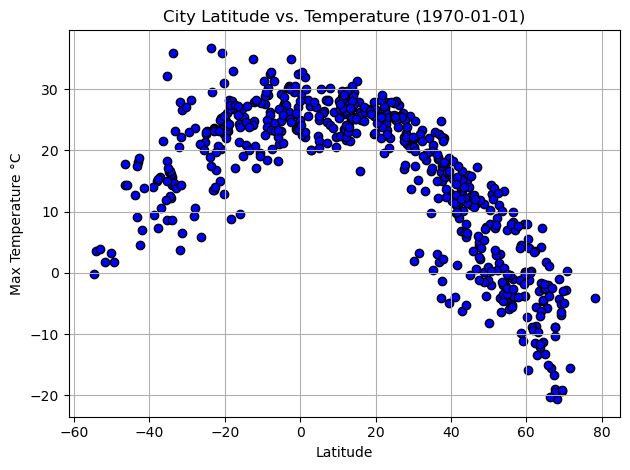

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

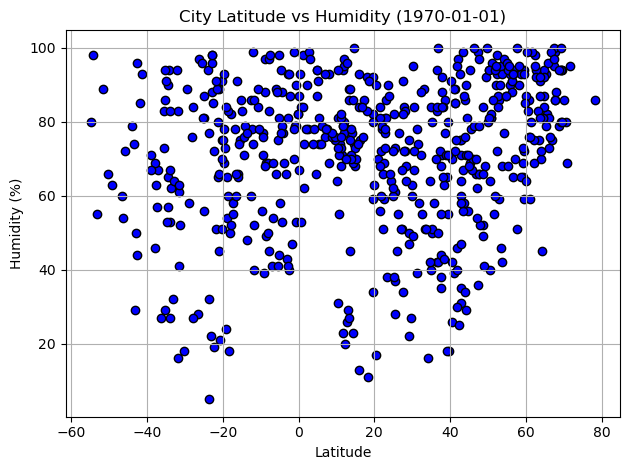

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o',
           facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

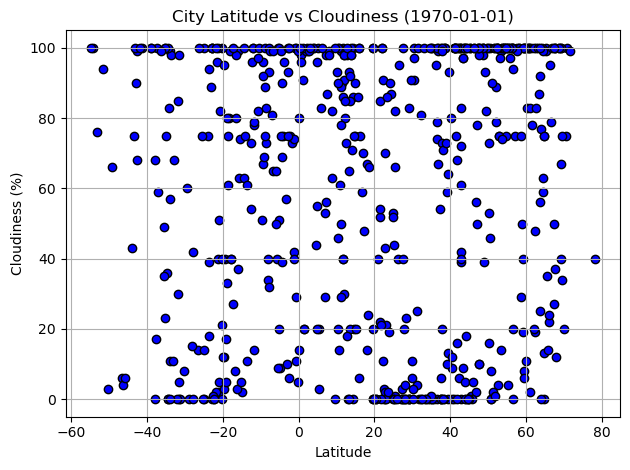

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o",
           facecolors="b", edgecolors="k")
# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

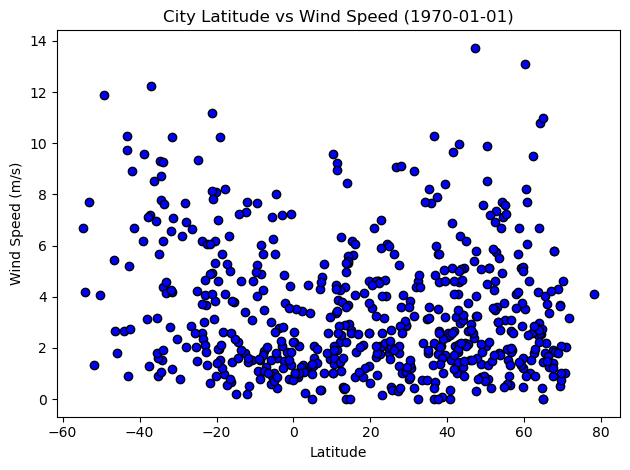

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o",
           facecolor="b", edgecolors="k")
# Incorporate the other graph properties
plt.grid
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#Latitude vs Max Temp 
def linear_regress(x,y, eqn_coordinates):
    r = st.pearsonr(x,y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = (f"y ={slope: .2f}x +{intercept: .2f}")
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=14, color="red")
    plt.scatter(x,y)


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itoman,26.1247,127.6694,27.43,55,40,5.66,JP,1970-01-01
4,siwa oasis,29.2041,25.5195,21.27,75,0,2.87,EG,1970-01-01
5,hawaiian paradise park,19.5933,-154.9731,26.73,82,100,2.57,US,1970-01-01
6,mount pearl,47.5166,-52.7813,4.52,66,10,4.02,CA,1970-01-01
7,poltavka,54.3663,71.7632,-1.91,94,100,7.11,RU,1970-01-01


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,14.37,60,6,5.42,NZ,1970-01-01
2,port-aux-francais,-49.3500,70.2167,1.86,63,66,11.90,TF,1970-01-01
3,adamstown,-25.0660,-130.1015,22.65,81,100,4.23,PN,1970-01-01
11,blackmans bay,-43.0167,147.3167,18.07,50,90,0.89,AU,1970-01-01
12,uturoa,-16.7333,-151.4333,26.56,78,8,6.36,PF,1970-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8852198387925291


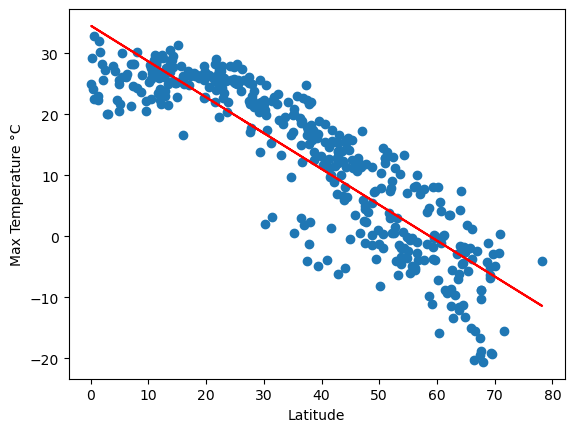

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Max Temp"], (10,-30))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")


# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_MaxTemp")

The r-value is: 0.6847539860216766


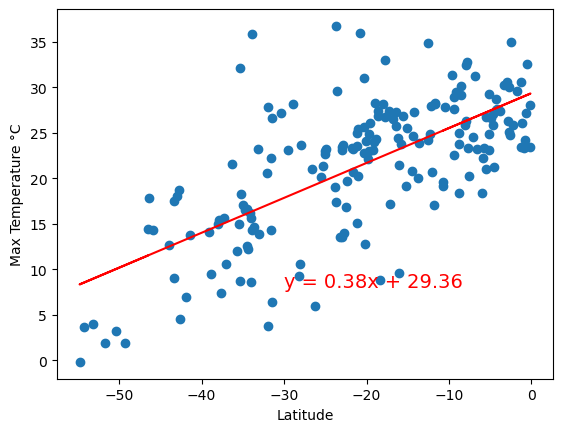

In [17]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Max Temp"], (-30,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_MaxTemp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1892017892455519


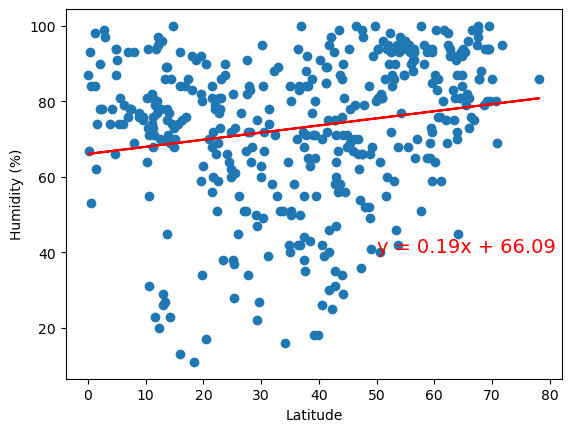

In [18]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Humidity"], (50,40))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_Humidity")

The r-value is: 0.10212029971771122


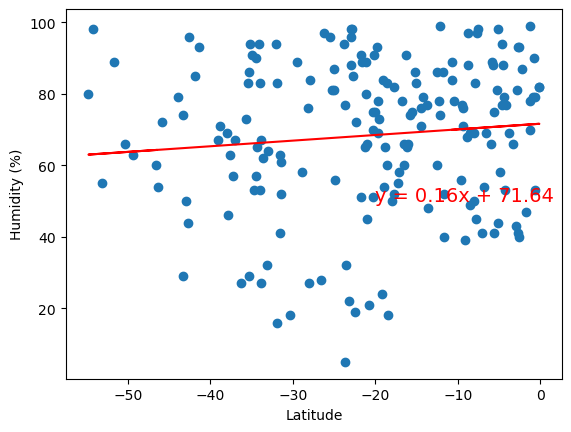

In [19]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Humidity"], (-20,50))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08111084612930432


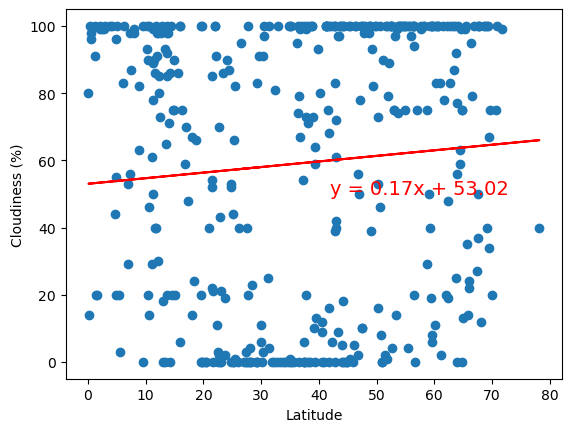

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Cloudiness"], (42,50))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_Cloudiness")

The r-value is: 0.0881551364510556


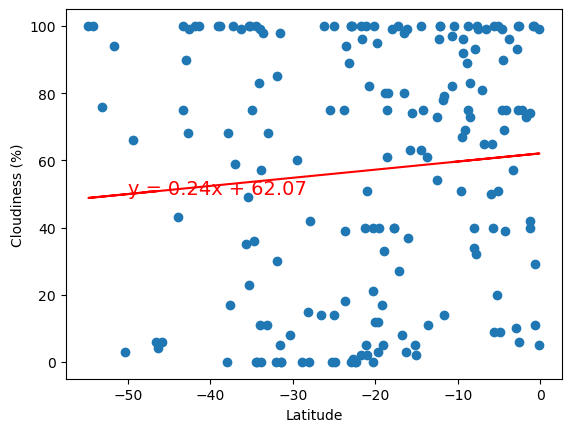

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50,50))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10039627776333476


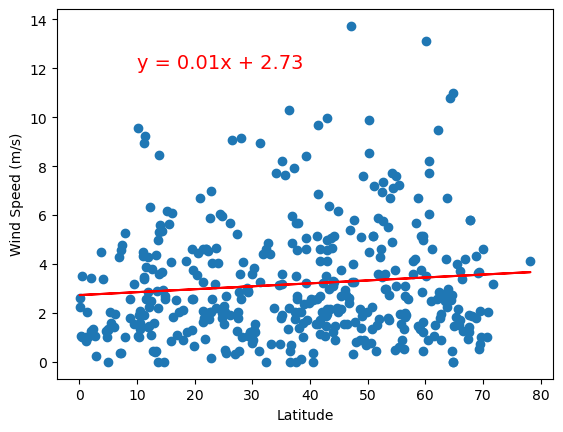

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df["Wind Speed"], (10,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/LinRegress_NH_Lat_vs_WindSpeed")

The r-value is: -0.3468657976279802


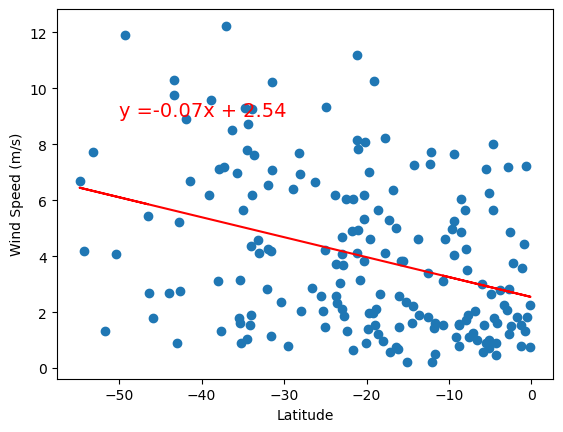

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50,9))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/LinRegress_SH_Lat_vs_WindSpeed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE